# Inisialisasi

In [0]:
# !pip install -q --upgrade ipython
# !pip install -q --upgrade ipykernel

# !pip install -q --upgrade ipython==5.5.0
# !pip install -q --upgrade ipykernel==4.6.0

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
# from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from scipy.stats import zscore

# from sklearn.decomposition import PCA as sklearnPCA
# from sklearn.preprocessing import StandardScaler

# from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import time

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, ShuffleSplit

import time

from sklearn.model_selection import KFold

from sklearn.neural_network import MLPClassifier

In [0]:
# url = 'https://raw.githubusercontent.com/hasobi/skripsi/master/dataset/KDDTrain%2B_v1.csv'
url = 'https://raw.githubusercontent.com/hasobi/skripsi/dev/dataset/gabungan_train_test-original.csv'

In [0]:
df = pd.read_csv(url)

In [0]:
data = df

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

In [0]:
# data_primary = data.loc[data['type_attack'].isin(['normal','dos'])]

In [0]:
# data_primary.head()
# data_primary = data

In [0]:
protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}

# data_primary.replace(flag_dict, inplace = True)
# data_primary.replace(service_dict, inplace = True)
# data_primary.replace(protocol_dict, inplace = True)

data.replace(flag_dict, inplace = True)
data.replace(service_dict, inplace = True)
data.replace(protocol_dict, inplace = True)


In [11]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [0]:
data_all = data#.drop(columns=['num_packet', 'type_attack'])

In [13]:
data_all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [14]:
data_all.type_attack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [0]:
# attck_dict={
#     "normal" : 0,
#     "dos" : 1,
#     "probe" : 2,
#     "r2l" : 3,
#     "u2r" : 4
    
# }
# data_all.replace(attck_dict, inplace = True)

In [16]:
data_all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [17]:
data_all.type_attack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

# Original

In [19]:
## MULAI PCA

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data_all.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
plt.figure(figsize=(20,10)) 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

ValueError: ignored

In [0]:
pca = PCA(n_components=43)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

In [0]:
df.shape

In [0]:
df.mean(axis = 0) 

In [0]:
df2 = df.drop(columns=['column 0',
                       'column 4',
                       'column 5',
                       'column 7',
                       'column 9',
                       'column 10',
                       'column 11',
                       'column 13',
                       'column 14',
                       'column 15',
                       'column 17',
                       'column 22',
                       'column 25',
                       'column 26',
                       'column 30',
                       'column 31',
                       'column 33',
                       'column 34',
                       'column 35',
                       'column 36',
                       'column 37',
                       'column 38',
                       'column 40',
                       'column 41'])

In [0]:
# df2.head()
df2.mean(axis = 0) 

# 12,3,6,8,12,16,18,19,20,21,23,24,27,28,29,32,39

In [0]:
df2.head()

In [0]:
# 5 most significant
# col 2,3,6,20,8 + target 42


In [0]:
dfv1 = df.drop(columns=['column 41'])

In [0]:
dfv1.head()

In [0]:
dfv1.mean(axis=0)

In [0]:
dfv1.head()

In [0]:
df.head()

In [0]:
X = df.loc[:, :'column 40']
y = df.loc[:, 'column 42']

In [0]:
y = y.astype(str)

temp = set(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

In [0]:
clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

In [0]:
clf.fit(X_train, y_train)

In [0]:
stop = time.time()
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

In [0]:
clf = MLPClassifier(random_state = 5, max_iter=300)

scoring = {'accuracy': make_scorer(accuracy_score)}

In [0]:
start = time.time()

In [0]:
cv = ShuffleSplit(n_splits=3, test_size=0.33, random_state=5)
scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

In [0]:
stop = time.time()
print(f"Cross Validation time : {stop - start}s")

In [0]:
print(scores)

# 41

In [20]:
data_all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [22]:
data_all.shape

(173708, 43)

In [0]:
data_all1 = data_all.drop(columns=['type_attack'])

In [24]:
data_all1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


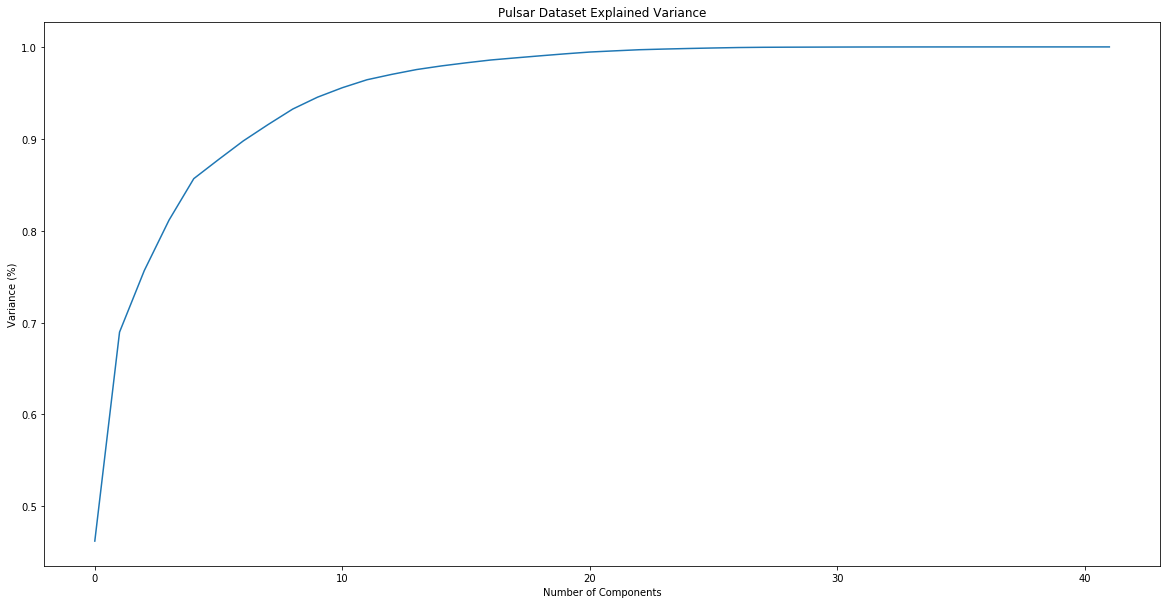

In [25]:
## MULAI PCA

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data_all1.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
plt.figure(figsize=(20,10)) 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [26]:
pca = PCA(n_components=42)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,column 41
0,-0.220263,0.117158,0.551728,-0.220319,0.398608,-0.221070,-0.213131,0.009363,-0.470655,-0.053478,-0.030418,0.174920,-0.227275,-0.083463,0.003182,-0.009925,0.081712,-0.020905,-0.075399,-0.036697,0.008401,0.083407,-0.044415,-0.004790,-0.001110,-0.012266,-0.019738,-0.001655,-0.001751,0.003431,0.003058,-0.004125,-0.000117,0.000086,0.000089,-0.000254,0.000107,-0.000090,-0.000057,1.729124e-05,-0.000013,-9.125242e-18
1,0.283156,0.374941,0.763011,-0.568851,0.879016,-0.059989,0.040570,0.248593,0.326108,0.228155,-0.409901,-0.355404,-0.021435,0.115609,0.088787,-0.154795,-0.275540,0.064058,-0.155165,0.015133,0.008818,-0.178190,0.069323,0.056943,-0.007894,0.035091,0.004748,0.005742,0.004283,-0.000537,0.002308,-0.000051,-0.000483,-0.001212,-0.000659,0.000214,0.000673,0.000034,-0.000019,-1.012244e-05,-0.000002,1.099643e-17
2,1.730035,-0.559688,-0.083644,0.074427,-0.062983,0.018016,-0.060557,-0.029682,0.110748,-0.042880,-0.095699,0.035051,0.016367,0.028254,0.025794,-0.008829,-0.016795,-0.009805,-0.006691,0.011112,-0.002559,-0.049455,0.018049,0.005833,0.000053,0.000893,0.003837,0.001250,0.000104,0.000766,-0.000042,-0.000727,-0.000108,-0.000015,-0.000040,-0.000016,-0.000081,-0.000006,0.000004,5.134467e-07,0.000004,4.163820e-17
3,-1.012294,-0.477584,-0.223981,0.417013,-0.195976,-0.268309,0.066899,0.123135,0.059971,0.013308,0.045549,0.008524,-0.057806,0.000559,0.065084,-0.028309,0.049561,0.127100,-0.050662,0.003982,0.003672,-0.000636,-0.004593,-0.071792,-0.010979,0.019011,-0.010778,0.012576,0.000145,-0.000248,-0.001030,0.000185,0.000296,0.000078,0.000062,0.000581,0.000280,-0.000076,-0.000024,-1.872262e-06,-0.000002,-5.220283e-17
4,-1.002430,-0.347474,-0.500375,-0.228183,0.022351,0.162668,0.103342,-0.144793,0.027530,0.063156,-0.031413,0.015841,-0.013468,0.016299,-0.063706,0.027563,-0.008439,0.010717,0.009364,-0.006652,0.000444,-0.005027,0.004548,0.006820,-0.000173,0.001510,0.003748,-0.002281,-0.000019,-0.000959,-0.000108,0.000036,-0.000914,0.000192,0.000077,-0.000009,-0.000009,0.000062,0.000077,4.686759e-06,0.000006,-5.195947e-19


In [27]:
df.shape

(173708, 42)

In [28]:
data_attack = data_all['type_attack']
data_attack.shape

(173708,)

In [29]:
data_all2 = pd.concat([df, data_attack], axis=1)
data_all2.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,column 41,type_attack
0,-0.220263,0.117158,0.551728,-0.220319,0.398608,-0.221070,-0.213131,0.009363,-0.470655,-0.053478,-0.030418,0.174920,-0.227275,-0.083463,0.003182,-0.009925,0.081712,-0.020905,-0.075399,-0.036697,0.008401,0.083407,-0.044415,-0.004790,-0.001110,-0.012266,-0.019738,-0.001655,-0.001751,0.003431,0.003058,-0.004125,-0.000117,0.000086,0.000089,-0.000254,0.000107,-0.000090,-0.000057,1.729124e-05,-0.000013,-9.125242e-18,normal
1,0.283156,0.374941,0.763011,-0.568851,0.879016,-0.059989,0.040570,0.248593,0.326108,0.228155,-0.409901,-0.355404,-0.021435,0.115609,0.088787,-0.154795,-0.275540,0.064058,-0.155165,0.015133,0.008818,-0.178190,0.069323,0.056943,-0.007894,0.035091,0.004748,0.005742,0.004283,-0.000537,0.002308,-0.000051,-0.000483,-0.001212,-0.000659,0.000214,0.000673,0.000034,-0.000019,-1.012244e-05,-0.000002,1.099643e-17,normal
2,1.730035,-0.559688,-0.083644,0.074427,-0.062983,0.018016,-0.060557,-0.029682,0.110748,-0.042880,-0.095699,0.035051,0.016367,0.028254,0.025794,-0.008829,-0.016795,-0.009805,-0.006691,0.011112,-0.002559,-0.049455,0.018049,0.005833,0.000053,0.000893,0.003837,0.001250,0.000104,0.000766,-0.000042,-0.000727,-0.000108,-0.000015,-0.000040,-0.000016,-0.000081,-0.000006,0.000004,5.134467e-07,0.000004,4.163820e-17,dos
3,-1.012294,-0.477584,-0.223981,0.417013,-0.195976,-0.268309,0.066899,0.123135,0.059971,0.013308,0.045549,0.008524,-0.057806,0.000559,0.065084,-0.028309,0.049561,0.127100,-0.050662,0.003982,0.003672,-0.000636,-0.004593,-0.071792,-0.010979,0.019011,-0.010778,0.012576,0.000145,-0.000248,-0.001030,0.000185,0.000296,0.000078,0.000062,0.000581,0.000280,-0.000076,-0.000024,-1.872262e-06,-0.000002,-5.220283e-17,normal
4,-1.002430,-0.347474,-0.500375,-0.228183,0.022351,0.162668,0.103342,-0.144793,0.027530,0.063156,-0.031413,0.015841,-0.013468,0.016299,-0.063706,0.027563,-0.008439,0.010717,0.009364,-0.006652,0.000444,-0.005027,0.004548,0.006820,-0.000173,0.001510,0.003748,-0.002281,-0.000019,-0.000959,-0.000108,0.000036,-0.000914,0.000192,0.000077,-0.000009,-0.000009,0.000062,0.000077,4.686759e-06,0.000006,-5.195947e-19,normal


In [30]:
data_all2.shape

(173708, 43)

In [31]:
data_all2.mean()
# column 2,3,6,11,12,13,16,17,19,25,26,27,28,29,31,32,35,40

# 5 terbaik = column 12 13 16 26 27

column 0    -7.532232e-17
column 1    -3.286364e-16
column 2     4.575457e-17
column 3     2.663694e-17
column 4    -3.315967e-17
column 5     3.974121e-18
column 6    -1.190223e-17
column 7    -2.073312e-17
column 8    -1.487196e-17
column 9    -2.520672e-17
column 10   -6.468373e-17
column 11    3.138457e-17
column 12    1.079193e-16
column 13    1.365729e-17
column 14   -1.147897e-17
column 15   -1.421525e-17
column 16    2.102009e-17
column 17    6.922412e-17
column 18   -2.582436e-17
column 19    8.157718e-19
column 20   -2.161314e-17
column 21   -7.697082e-17
column 22   -5.745643e-17
column 23   -3.999695e-17
column 24   -1.446844e-17
column 25    5.756749e-17
column 26    2.151973e-17
column 27    2.140984e-17
column 28    3.647383e-19
column 29    1.478337e-18
column 30   -1.520502e-18
column 31    6.350423e-19
column 32    2.612359e-19
column 33   -1.215981e-19
column 34   -2.920096e-20
column 35    6.463336e-19
column 36   -9.048310e-20
column 37   -7.020463e-21
column 38   

In [0]:
X = data_all2.loc[:, :'column 40']
y = data_all2.loc[:, 'type_attack']

In [0]:
y = y.astype(str)

temp = set(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

In [0]:
clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

In [37]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=5, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
stop = time.time()
print(f"training time : {stop - start}s")

training time : 87.17526507377625s


In [39]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.9968721816053576

In [0]:
clf = MLPClassifier(random_state = 5, max_iter=300)

scoring = {'accuracy': make_scorer(accuracy_score)}

In [0]:
start = time.time()

In [0]:
cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)
scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

In [43]:
stop = time.time()
print(f"Cross Validation time : {stop - start}s")

Cross Validation time : 211.93347668647766s


In [44]:
print(scores)

{'fit_time': array([87.18795848, 54.13334179, 68.98507214]), 'score_time': array([0.17235327, 0.17238808, 0.16806602]), 'test_accuracy': array([0.99687218, 0.99731353, 0.9966611 ]), 'train_accuracy': array([0.99840454, 0.99833052, 0.99833875])}


# Take 18

In [45]:
# column 2,3,6,11,12,13,16,17,19,25,26,27,28,29,31,32,35,40
data_all2.head(5)

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,column 41,type_attack
0,-0.220263,0.117158,0.551728,-0.220319,0.398608,-0.221070,-0.213131,0.009363,-0.470655,-0.053478,-0.030418,0.174920,-0.227275,-0.083463,0.003182,-0.009925,0.081712,-0.020905,-0.075399,-0.036697,0.008401,0.083407,-0.044415,-0.004790,-0.001110,-0.012266,-0.019738,-0.001655,-0.001751,0.003431,0.003058,-0.004125,-0.000117,0.000086,0.000089,-0.000254,0.000107,-0.000090,-0.000057,1.729124e-05,-0.000013,-9.125242e-18,normal
1,0.283156,0.374941,0.763011,-0.568851,0.879016,-0.059989,0.040570,0.248593,0.326108,0.228155,-0.409901,-0.355404,-0.021435,0.115609,0.088787,-0.154795,-0.275540,0.064058,-0.155165,0.015133,0.008818,-0.178190,0.069323,0.056943,-0.007894,0.035091,0.004748,0.005742,0.004283,-0.000537,0.002308,-0.000051,-0.000483,-0.001212,-0.000659,0.000214,0.000673,0.000034,-0.000019,-1.012244e-05,-0.000002,1.099643e-17,normal
2,1.730035,-0.559688,-0.083644,0.074427,-0.062983,0.018016,-0.060557,-0.029682,0.110748,-0.042880,-0.095699,0.035051,0.016367,0.028254,0.025794,-0.008829,-0.016795,-0.009805,-0.006691,0.011112,-0.002559,-0.049455,0.018049,0.005833,0.000053,0.000893,0.003837,0.001250,0.000104,0.000766,-0.000042,-0.000727,-0.000108,-0.000015,-0.000040,-0.000016,-0.000081,-0.000006,0.000004,5.134467e-07,0.000004,4.163820e-17,dos
3,-1.012294,-0.477584,-0.223981,0.417013,-0.195976,-0.268309,0.066899,0.123135,0.059971,0.013308,0.045549,0.008524,-0.057806,0.000559,0.065084,-0.028309,0.049561,0.127100,-0.050662,0.003982,0.003672,-0.000636,-0.004593,-0.071792,-0.010979,0.019011,-0.010778,0.012576,0.000145,-0.000248,-0.001030,0.000185,0.000296,0.000078,0.000062,0.000581,0.000280,-0.000076,-0.000024,-1.872262e-06,-0.000002,-5.220283e-17,normal
4,-1.002430,-0.347474,-0.500375,-0.228183,0.022351,0.162668,0.103342,-0.144793,0.027530,0.063156,-0.031413,0.015841,-0.013468,0.016299,-0.063706,0.027563,-0.008439,0.010717,0.009364,-0.006652,0.000444,-0.005027,0.004548,0.006820,-0.000173,0.001510,0.003748,-0.002281,-0.000019,-0.000959,-0.000108,0.000036,-0.000914,0.000192,0.000077,-0.000009,-0.000009,0.000062,0.000077,4.686759e-06,0.000006,-5.195947e-19,normal


In [46]:
data_all2.shape

(173708, 43)

In [0]:
df18 = data_all2[['column 2',
                  'column 3',
                  'column 6',
                  'column 11',
                  'column 12',
                  'column 13',
                  'column 16',
                  'column 17',
                  'column 19',
                  'column 25',
                  'column 26',
                  'column 27',
                  'column 28',
                  'column 29',
                  'column 31',
                  'column 32',
                  'column 35',
                  'column 40']]

In [48]:
df18.head()

,column 2,column 3,column 6,column 11,column 12,column 13,column 16,column 17,column 19,column 25,column 26,column 27,column 28,column 29,column 31,column 32,column 35,column 40
0,0.551728,-0.220319,-0.213131,0.174920,-0.227275,-0.083463,0.081712,-0.020905,-0.036697,-0.012266,-0.019738,-0.001655,-0.001751,0.003431,-0.004125,-0.000117,-0.000254,-0.000013
1,0.763011,-0.568851,0.040570,-0.355404,-0.021435,0.115609,-0.275540,0.064058,0.015133,0.035091,0.004748,0.005742,0.004283,-0.000537,-0.000051,-0.000483,0.000214,-0.000002
2,-0.083644,0.074427,-0.060557,0.035051,0.016367,0.028254,-0.016795,-0.009805,0.011112,0.000893,0.003837,0.001250,0.000104,0.000766,-0.000727,-0.000108,-0.000016,0.000004
3,-0.223981,0.417013,0.066899,0.008524,-0.057806,0.000559,0.049561,0.127100,0.003982,0.019011,-0.010778,0.012576,0.000145,-0.000248,0.000185,0.000296,0.000581,-0.000002
4,-0.500375,-0.228183,0.103342,0.015841,-0.013468,0.016299,-0.008439,0.010717,-0.006652,0.001510,0.003748,-0.002281,-0.000019,-0.000959,0.000036,-0.000914,-0.000009,0.000006


In [0]:
df18v2 = pd.concat([df18, data_attack], axis=1)

In [50]:
df18v2.head(5)

,column 2,column 3,column 6,column 11,column 12,column 13,column 16,column 17,column 19,column 25,column 26,column 27,column 28,column 29,column 31,column 32,column 35,column 40,type_attack
0,0.551728,-0.220319,-0.213131,0.174920,-0.227275,-0.083463,0.081712,-0.020905,-0.036697,-0.012266,-0.019738,-0.001655,-0.001751,0.003431,-0.004125,-0.000117,-0.000254,-0.000013,normal
1,0.763011,-0.568851,0.040570,-0.355404,-0.021435,0.115609,-0.275540,0.064058,0.015133,0.035091,0.004748,0.005742,0.004283,-0.000537,-0.000051,-0.000483,0.000214,-0.000002,normal
2,-0.083644,0.074427,-0.060557,0.035051,0.016367,0.028254,-0.016795,-0.009805,0.011112,0.000893,0.003837,0.001250,0.000104,0.000766,-0.000727,-0.000108,-0.000016,0.000004,dos
3,-0.223981,0.417013,0.066899,0.008524,-0.057806,0.000559,0.049561,0.127100,0.003982,0.019011,-0.010778,0.012576,0.000145,-0.000248,0.000185,0.000296,0.000581,-0.000002,normal
4,-0.500375,-0.228183,0.103342,0.015841,-0.013468,0.016299,-0.008439,0.010717,-0.006652,0.001510,0.003748,-0.002281,-0.000019,-0.000959,0.000036,-0.000914,-0.000009,0.000006,normal


In [51]:
df18v2.shape

(173708, 19)

In [0]:
X = df18v2.loc[:, :'column 40']
y = df18v2.loc[:, 'type_attack']

In [0]:
y = y.astype(str)

temp = set(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

In [0]:
clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

In [57]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=5, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [58]:
stop = time.time()
print(f"training time : {stop - start}s")

training time : 180.59806966781616s


In [59]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.9940321992593019

In [0]:
clf = MLPClassifier(random_state = 5, max_iter=300)

scoring = {'accuracy': make_scorer(accuracy_score)}

In [0]:
start = time.time()

In [0]:
cv = ShuffleSplit(n_splits=3, test_size=0.3, train_size = 0.7, random_state=5)
scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

In [0]:
stop = time.time()
print(f"Cross Validation time : {stop - start}s")

Cross Validation time : 536.0830881595612s


In [0]:
print(scores)

{'fit_time': array([198.56192827, 174.99538183, 159.85665798]), 'score_time': array([0.20029044, 0.18027925, 0.18645763]), 'test_accuracy': array([0.99405136, 0.9934059 , 0.99337101]), 'train_accuracy': array([0.99683805, 0.99609912, 0.99591009])}


# 5 data

In [60]:
data_all2.head(5)

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,column 41,type_attack
0,-0.220263,0.117158,0.551728,-0.220319,0.398608,-0.221070,-0.213131,0.009363,-0.470655,-0.053478,-0.030418,0.174920,-0.227275,-0.083463,0.003182,-0.009925,0.081712,-0.020905,-0.075399,-0.036697,0.008401,0.083407,-0.044415,-0.004790,-0.001110,-0.012266,-0.019738,-0.001655,-0.001751,0.003431,0.003058,-0.004125,-0.000117,0.000086,0.000089,-0.000254,0.000107,-0.000090,-0.000057,1.729124e-05,-0.000013,-9.125242e-18,normal
1,0.283156,0.374941,0.763011,-0.568851,0.879016,-0.059989,0.040570,0.248593,0.326108,0.228155,-0.409901,-0.355404,-0.021435,0.115609,0.088787,-0.154795,-0.275540,0.064058,-0.155165,0.015133,0.008818,-0.178190,0.069323,0.056943,-0.007894,0.035091,0.004748,0.005742,0.004283,-0.000537,0.002308,-0.000051,-0.000483,-0.001212,-0.000659,0.000214,0.000673,0.000034,-0.000019,-1.012244e-05,-0.000002,1.099643e-17,normal
2,1.730035,-0.559688,-0.083644,0.074427,-0.062983,0.018016,-0.060557,-0.029682,0.110748,-0.042880,-0.095699,0.035051,0.016367,0.028254,0.025794,-0.008829,-0.016795,-0.009805,-0.006691,0.011112,-0.002559,-0.049455,0.018049,0.005833,0.000053,0.000893,0.003837,0.001250,0.000104,0.000766,-0.000042,-0.000727,-0.000108,-0.000015,-0.000040,-0.000016,-0.000081,-0.000006,0.000004,5.134467e-07,0.000004,4.163820e-17,dos
3,-1.012294,-0.477584,-0.223981,0.417013,-0.195976,-0.268309,0.066899,0.123135,0.059971,0.013308,0.045549,0.008524,-0.057806,0.000559,0.065084,-0.028309,0.049561,0.127100,-0.050662,0.003982,0.003672,-0.000636,-0.004593,-0.071792,-0.010979,0.019011,-0.010778,0.012576,0.000145,-0.000248,-0.001030,0.000185,0.000296,0.000078,0.000062,0.000581,0.000280,-0.000076,-0.000024,-1.872262e-06,-0.000002,-5.220283e-17,normal
4,-1.002430,-0.347474,-0.500375,-0.228183,0.022351,0.162668,0.103342,-0.144793,0.027530,0.063156,-0.031413,0.015841,-0.013468,0.016299,-0.063706,0.027563,-0.008439,0.010717,0.009364,-0.006652,0.000444,-0.005027,0.004548,0.006820,-0.000173,0.001510,0.003748,-0.002281,-0.000019,-0.000959,-0.000108,0.000036,-0.000914,0.000192,0.000077,-0.000009,-0.000009,0.000062,0.000077,4.686759e-06,0.000006,-5.195947e-19,normal


In [0]:
# column 12 13 16 26 27

df5 = data_all2[['column 12',
                  'column 13',
                  'column 16',
                  'column 26',
                  'column 27']]

In [0]:
df5v2 = pd.concat([df5, data_attack], axis=1)

In [63]:
df5v2.head(5)

,column 12,column 13,column 16,column 26,column 27,type_attack
0,-0.227275,-0.083463,0.081712,-0.019738,-0.001655,normal
1,-0.021435,0.115609,-0.275540,0.004748,0.005742,normal
2,0.016367,0.028254,-0.016795,0.003837,0.001250,dos
3,-0.057806,0.000559,0.049561,-0.010778,0.012576,normal
4,-0.013468,0.016299,-0.008439,0.003748,-0.002281,normal


In [0]:
X = df5v2.loc[:, :'column 27']
y = df5v2.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)



In [0]:
start = time.time()

In [66]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=5, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [67]:
stop = time.time()
print(f"training time : {stop - start}s")

training time : 186.04488158226013s


In [68]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.8971849634448218

In [0]:
clf = MLPClassifier(random_state = 5, max_iter=300)

scoring = {'accuracy': make_scorer(accuracy_score)}

In [0]:
start = time.time()

In [71]:
cv = ShuffleSplit(n_splits=3, test_size=0.3, train_size = 0.7, random_state=5)
scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [72]:
stop = time.time()
print(f"Cross Validation time : {stop - start}s")

Cross Validation time : 866.7507781982422s


In [0]:
print(scores)

# Jumlah DATA

In [0]:
datanormal = df18v2.loc[df18v2['type_attack'].isin(['normal'])]
datanormal.shape

(90502, 19)

In [0]:
datados = df18v2.loc[df18v2['type_attack'].isin(['dos'])]
datados.shape

(62621, 19)

In [0]:
dataprobe = df18v2.loc[df18v2['type_attack'].isin(['probe'])]
dataprobe.shape

(16366, 19)

In [0]:
datar2l = df18v2.loc[df18v2['type_attack'].isin(['r2l'])]
datar2l.shape

(4089, 19)

In [0]:
datau2r = df18v2.loc[df18v2['type_attack'].isin(['u2r'])]
datau2r.shape

(130, 19)